In [2]:
import numpy as np
import pandas as pd
from pandas import Series

def encabezado(titulo):
  print()
  print("-" * 50)
  print("[" + titulo + "]")
  print("-" * 50)

# pandas: librería para trabajar con datos
- Procesado  
- Extracción  
- Manipulación

### Dependencias de librerías de análisis de datos

![dependencias](https://raw.githubusercontent.com/DRMiguelAR/Herramientas_Analisis/master/imagenes/dependencias_pandas.png)

## Diferencias entre Pandas y Numpy  

---  
### NumPy  
* Estructuras de datos de bajo nivel
* Arreglos multidimensionales 
* Operaciones matemáticas avanzadas sobre arreglos 
---
### Pandas
* Estructuras de datos de alto nivel 
* Datos tabulares
* Alineación de datos
* Puede trabajar aunque haya datos faltantes
* Hay operaciones de bases de datos como *group*, *merge* y *join*
* Se pueden utilizar operaciones de NumPy o de SciPy sobre las estructuras de Pandas
---  
##### Existen dos estructuras de datos principales en pandas: las Series y los Dataframes  
---


# Series
Estructura de datos en la que asignará a cada elemento de un arreglo lineal un índice. Es un arreglo lineal al que cada dato le dan un índice.

## Generación de Series

In [32]:
# Crea una Serie de 4 números a partir de un arreglo de numpy e imprímela
data = np.array([4,7,-5,3])

encabezado("s1")
s1 = Series(data) # the index takes a lot of importance, but it's the same as an array
s1


--------------------------------------------------
[s1]
--------------------------------------------------


0    4
1    7
2   -5
3    3
dtype: int32

Ten en cuenta que los valores de la lista se pasan por referencia,   
esto es, si modificas la lista se modifica la serie.

In [33]:
# Modifica el valor del dato 0
data[0] = 100
s1

0    100
1      7
2     -5
3      3
dtype: int32

Por default se asigna un índice numérico entero comenzando en 0.  
Una serie está conformada por una lista de valores y una lista de índices.

Puedes poner el indice que quieras para los datos (strings, números, etc)

In [36]:
# De la Serie definida en el punto anterior, enlista los valores y 
# los índices por separado
display(s1.values)
display(s1.index)
display(list(s1.index))

array([100,   7,  -5,   3])

RangeIndex(start=0, stop=4, step=1)

[0, 1, 2, 3]

Podemos instanciar una serie agregando un índice personalizado,  
que puede agregar más significado

In [37]:
# Crea dos listas, una de datos y otra de índices,
# donde por lo menos unos de los índices sean las 
# letras a, r, m
# Genera una serie en donde la segunda lista sea
# el índice
indexes = ['m', 'a', 'r', 'x'] # these will be the indexes of every data value
s2 = Series(data, index=indexes)
s2

m    100
a      7
r     -5
x      3
dtype: int32

## Obtención de los elementos de una serie
Podemos consultar la serie utilizando los índices, como si
fueran diccionarios o arreglos de Python

In [38]:
# Obtén el valor del índice a dentro de la serie anterior
s2["a"] # like a dict (index)

7

También lo podemos consultar como arreglo de numpy

In [39]:
# Obtén el valor de los índices 0 al 2
s2[0] # like an array (position)
s2[0:2] # returns a series

100

Además, se pueden filtrar los datos pasando como búsqueda una lista de índices

In [47]:
# A partir de la anterior serie, obtén una serie con los 
# índices a, r, m
# you can send series (any data structure) inside of [] as a filter of a series
# returns a series always
display(s2[['a', 'r', 'm']])
display(s2[[False, False, True, True]])
display(s2[list('mar')])
display(s2[['a']])

a      7
r     -5
m    100
dtype: int32

r   -5
x    3
dtype: int32

m    100
a      7
r     -5
dtype: int32

a    7
dtype: int32

## Asignación de valores a los elementos
Una Serie es modificable, lo que significa que puedo cambiar los valores de  
sus datos

In [44]:
np.random.seed(1000)
values= np.random.randint(-3,3,10)
indices= list("abcdefghij")
s3= Series(values, index= indices)
s3

a    0
b   -3
c    0
d    1
e   -2
f    2
g   -3
h   -2
i    2
j   -3
dtype: int32

In [45]:
# Cambia el valor del índice "b" a -10
# Cambia el primer valor a -3
s3['b'] = -10
s3[0] = -3
s3

a    -3
b   -10
c     0
d     1
e    -2
f     2
g    -3
h    -2
i     2
j    -3
dtype: int32

## Operaciones matemáticas sobre series
Al estar basada en numpy, pandas permite realizar operaciones matemáticas sobre las series.

In [48]:
# Multiplica la serie anterior por dos
s3*2

a    -6
b   -20
c     0
d     2
e    -4
f     4
g    -6
h    -4
i     4
j    -6
dtype: int32

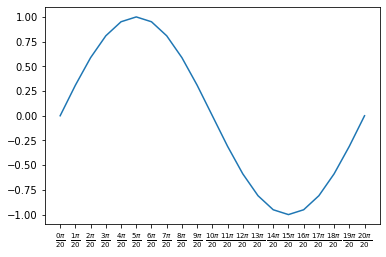

In [54]:
# Genera una serie con once valores entre cero y 2pi
# Genera una nueva serie con los valores del seno de la serie anterior
# Grafica
import matplotlib.pyplot as plt
n = 20
values = np.linspace(0, 2*np.pi, n + 1)
# r string: used for latex
indices = [r"$\frac{"+  str(i) + "\pi}{20}$" for i in range(n + 1)]
s4 = Series(np.sin(values), index=indices) # directly puts the index as xlabels instead of 0 to 20 nums
plt.plot(s4)

### Filtros estilo numpy
Se puede utilizar un filtro donde se aplique la misma serie.

In [57]:
# Filtra de la serie 3, los valores mayores a 0
display(s3 > 0) # applies this operator to each element, returns a series
# you can send a series (data structure) inside []
display(s3[s3 > 0])

a    False
b    False
c    False
d     True
e    False
f     True
g    False
h    False
i     True
j    False
dtype: bool

d    1
f    2
i    2
dtype: int32

Se puede considerar una serie de pandas como un diccionario de python, por lo 
que acepta los mismos operadores.  
Estos operadores trabajan sobre los índices.

In [58]:
# Revisa si la x es parte de los índices serie 3
# Revisa si la g es parte de los índices serie 3
display("x" in s3)
display("g" in s3)

False

True

In [62]:
# Revisa si el 2 es parte de los índices de la serie 3
# looks inside the indices not the values
display(s3)
display(2 in s3)
display("g" in s3)

a    -3
b   -10
c     0
d     1
e    -2
f     2
g    -3
h    -2
i     2
j    -3
dtype: int32

False

True

In [17]:
d = {"Jalisco": 8348, "Colima":731, "Aguascalientes":1425, "Michoacán":4748, "Zacatecas":1622, "Nayarit":1235}
display(d)
# Genera una serie a partir del siguiente diccionario
# Población en miles de estados colindantes a Jalisco (2020)


{'Jalisco': 8348,
 'Colima': 731,
 'Aguascalientes': 1425,
 'Michoacán': 4748,
 'Zacatecas': 1622,
 'Nayarit': 1235}

In [68]:
# Al utilizar un diccionario para generar una serie, 
# se puede especificar cuáles son los índices que se deben utilizar
s6 = Series(d)
display(s6)

indices = ["Sinaloa", "Jalisco", "Colima", "Michoacán", "Zacatecas", "Nayarit", "Tamaulipas"] 
# the ones that are inside the dict, get their values
s7 = Series(d, index=indices)
display(s7)

Jalisco           8348
Colima             731
Aguascalientes    1425
Michoacán         4748
Zacatecas         1622
Nayarit           1235
dtype: int64

Sinaloa          NaN
Jalisco       8348.0
Colima         731.0
Michoacán     4748.0
Zacatecas     1622.0
Nayarit       1235.0
Tamaulipas       NaN
dtype: float64

## Validación de los valores
Si algún dato de nuestra serie es nulo, podemos detectar datos inválidos con las funciones __isnull__ o __notnull__

In [69]:
# Muestra cuáles de los elementos de la serie anterior son nulos
# returns a list of bools
s7.isnull()

Sinaloa        True
Jalisco       False
Colima        False
Michoacán     False
Zacatecas     False
Nayarit       False
Tamaulipas     True
dtype: bool

In [71]:
# Muestra cuáles de los elementos de la serie anterior no son nulos
display(s7.notnull())


Sinaloa       False
Jalisco        True
Colima         True
Michoacán      True
Zacatecas      True
Nayarit        True
Tamaulipas    False
dtype: bool

In [72]:
# Filtra los elementos nulos de la serie anterior con un filtro tipo numpy
s7[s7.notnull()]

Jalisco      8348.0
Colima        731.0
Michoacán    4748.0
Zacatecas    1622.0
Nayarit      1235.0
dtype: float64

También podemos revisar qué valores hay en la serie con las funciones:  
- __isin__: revisa para cada valor si pertenece a una estructura
- __unique__: regresa todos los valores que pertenecen a la serie, sin repetidos
- __value_counts__: regresa todos los valores que pertenecen a la serie, y cuántas veces aparecen

In [76]:
# utiliza isin para mostrar qué valores están entre -3 y 0
display(s3)
display(s3.isin([-3, 0])) # how many of those vals are either -3 or 0
display(s3[s3.isin([-3, 0])])

a    -3
b   -10
c     0
d     1
e    -2
f     2
g    -3
h    -2
i     2
j    -3
dtype: int32

a     True
b    False
c     True
d    False
e    False
f    False
g     True
h    False
i    False
j     True
dtype: bool

a   -3
c    0
g   -3
j   -3
dtype: int32

In [77]:
# utiliza unique sobre s3
s3.unique() # returns all unique values

array([ -3, -10,   0,   1,  -2,   2])

Se pueden aplicar operaciones automáticamente sobre dos series alineando los datos utilizando el índice

In [78]:
# utiliza value_counts sobre s3
s3.value_counts() # returns a series with values as indexes and counts as value

-3     3
 2     2
-2     2
 0     1
 1     1
-10    1
dtype: int64

In [81]:
# filtra de s3 solo los valores que aparecen 2 o mas veces
filtro = s3.value_counts()[s3.value_counts() >= 2]
# which ones are more than 2 times
s3[s3.isin(filtro.index)]

a   -3
e   -2
f    2
g   -3
h   -2
i    2
j   -3
dtype: int32

## Operaciones entre Series
Se pueden realizar operaciones aritméticas entre series.
Al hacerlo, se utilizarán las etiquetas para alinear los datos.

In [86]:
# Genera serie 8 y serie 9 con etiquetas en común
s8 = Series(list("guadalajara")).value_counts()
s9 = Series(list("guatemala")).value_counts()
display(s8)
display(s9)

a    5
u    1
j    1
r    1
l    1
d    1
g    1
dtype: int64

a    3
u    1
m    1
l    1
t    1
e    1
g    1
dtype: int64

In [87]:
# Suma s8 con s9
display(s8 + s9) 
# uses the indices: the ones in common are summed and the others are Nan (allows you to sum vectors of diff size)

a    8.0
d    NaN
e    NaN
g    2.0
j    NaN
l    2.0
m    NaN
r    NaN
t    NaN
u    2.0
dtype: float64

## Atributos de una serie
Una serie, además de valores e índice, también tiene otros atributos: 
- value
- index
- name
- dtype

In [91]:
display(s6)
s6.name = "Population 2020"
display(s6)
# a dataframe is a series list

Jalisco           8348
Colima             731
Aguascalientes    1425
Michoacán         4748
Zacatecas         1622
Nayarit           1235
Name: Population 2020, dtype: int64

Jalisco           8348
Colima             731
Aguascalientes    1425
Michoacán         4748
Zacatecas         1622
Nayarit           1235
Name: Population 2020, dtype: int64

In [95]:
# Para modificar un índice en particular
display(s2)
obj = list(s2.index)
obj[0] = 'e'
s2.index = obj
display(s2)

m    100
a      7
r     -5
x      3
dtype: int32

e    100
a      7
r     -5
x      3
dtype: int32

In [99]:
indices = ["a", "a", "b", "b"]
values = [1,2,3,4]
s10 = Series(values, index=indices)
display(s10['a']) # returns a series of all that have the same key
display(s10['a'][0])
display(s10['a'][1])

a    1
a    2
dtype: int64

1

2

### Dataframes

A dataframe is a matrix: is a list of series

In [101]:
from pandas import DataFrame
years = [2000, 2005, 2010, 2020]
states = ['Jalisco'] * 4
populations = [6.32, 6.75, 7.35, 8.34]
d = {"state":states, "year":years, "population":populations}
DataFrame(d)

,state,year,population
0,Jalisco,2000,6.32
1,Jalisco,2005,6.75
2,Jalisco,2010,7.35
3,Jalisco,2020,8.34
